# Einführung in die Data Science

In [1]:
# Importierungen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lade den Titanic-Datensatz (du kannst diesen Datensatz durch deinen eigenen ersetzen)
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

In [3]:
# Zeige die ersten Zeilen des Datensatzes an
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


<!-- # Aufgabe 1: Datenaufbereitung -->

## Aufgabe 1: Datenaufbereitung

In [4]:
# Überprüfe fehlende Werte im Datensatz
missing_values = df.isnull().sum()
print("Fehlende Werte pro Spalte:")
print(missing_values)

Fehlende Werte pro Spalte:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [5]:
# Fülle fehlende Werte in den relevanten Spalten (zum Beispiel Alter) mit dem Durchschnitt
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [6]:
# Lösche Zeilen mit fehlenden Werten in der Spalte "Embarked"
df.dropna(subset=['Fare'], inplace=True)

## Aufgabe 2: Explorative Datenanalyse (EDA)

In [7]:
# Statistische Zusammenfassung des Datensatzes
summary_statistics = df.describe()
print("Statistische Zusammenfassung:")
print(summary_statistics)

Statistische Zusammenfassung:
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000 

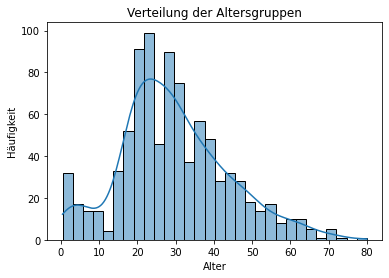

In [8]:
# Visualisiere die Verteilung der Altersgruppen
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Verteilung der Altersgruppen')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.show()

## Aufgabe 3: Feature Engineering

In [9]:
# Erstelle eine neue Spalte "Familienmitglieder" basierend auf "SibSp" und "Parch"
df['Family_Size'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

## Aufgabe 4: Visualisierung

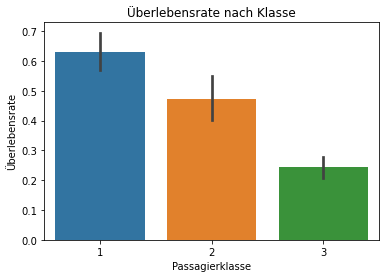

In [10]:
# Visualisiere die Überlebensrate nach Klasse
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Überlebensrate nach Klasse')
plt.xlabel('Passagierklasse')
plt.ylabel('Überlebensrate')
plt.show()

## Aufgabe 5: Korrelationsmatrix

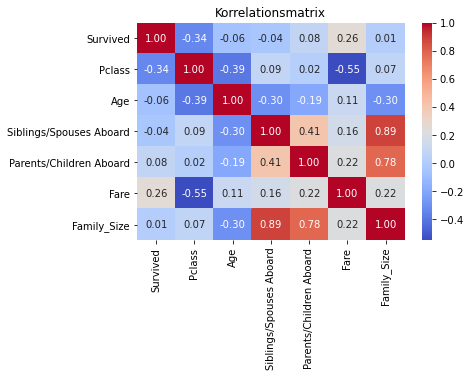

In [11]:
# Erstelle eine Korrelationsmatrix und zeige sie mit einer Heatmap an
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()

## Aufgabe 6: Klassifikation des Überlebensstatus

In [12]:
# Erstelle eine binäre Spalte "Survived_Binary" (1 für Überlebende, 0 für Nicht-Überlebende)
df['Survived_Binary'] = df['Survived'].astype(int)

## Aufgabe 7: Maschinelles Lernen

In [13]:
# Verwende einen einfachen Entscheidungsbaum-Klassifikator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Wähle Features und Zielvariable aus

# Extrahiere die Spaltennamen
feature_columns = df.columns.tolist()

# Erstelle X mit allen Spalten außer der Zielvariable
feature_columns.remove('Survived_Binary')  

X = df[feature_columns]
Y = df['Survived_Binary']

In [15]:
# Kodiere kategorische Variablen (Geschlecht und Hafen)
X = pd.get_dummies(X, columns=['Sex', 'Name'], drop_first=True)

In [16]:
# Teile den Datensatz in Trainings- und Testdaten auf
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Erstelle und trainiere den Entscheidungsbaum
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Mache Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

In [19]:
# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [20]:
print(f'Genauigkeit des Modells: {accuracy:.2f}')
print('Verwirrungsmatrix:')
print(conf_matrix)
print('Klassifikationsbericht:')
print(classification_rep)

Genauigkeit des Modells: 1.00
Verwirrungsmatrix:
[[111   0]
 [  0  67]]
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        67

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



## Extra

### Verständnis für die Diagramme

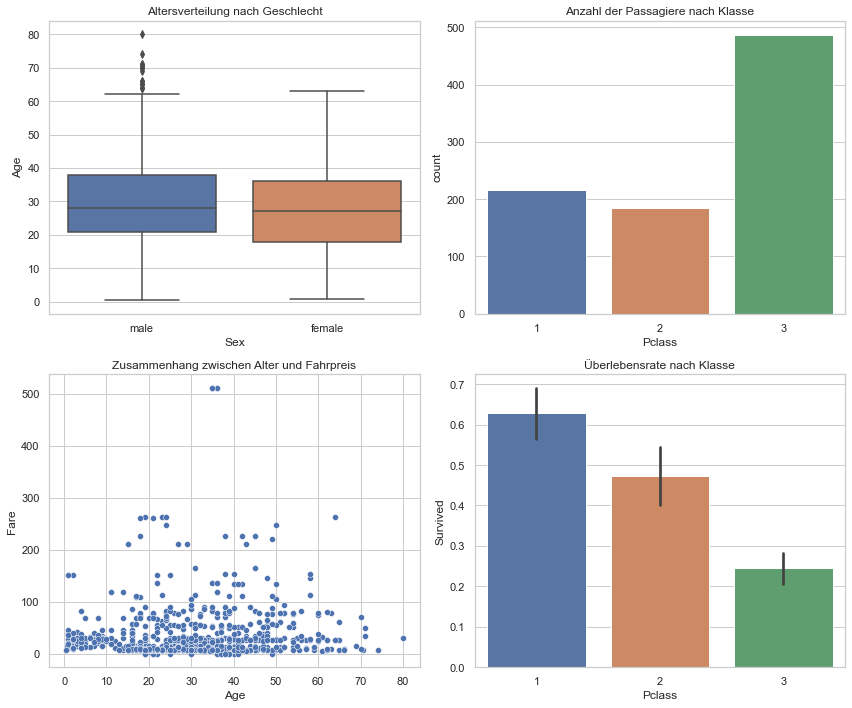

In [21]:
# Setze den Stil von Seaborn
sns.set(style="whitegrid")

# Erstelle ein Jupyter Notebook mit Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Diagramm 1: Boxplot für die Altersverteilung nach Geschlecht
sns.boxplot(x='Sex', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Altersverteilung nach Geschlecht')

# Diagramm 2: Zählplot für die Anzahl der Passagiere nach Klasse
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Anzahl der Passagiere nach Klasse')

# Diagramm 3: Streudiagramm für Zusammenhang zwischen Alter und Fahrpreis
sns.scatterplot(x='Age', y='Fare', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Zusammenhang zwischen Alter und Fahrpreis')

# Diagramm 4: Balkendiagramm für die Anzahl der Überlebenden nach Klasse
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Überlebensrate nach Klasse')

# Optimiere das Layout
plt.tight_layout()

# Zeige die Diagramme an
plt.show()